# 패키지 로드

In [ ]:
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/content/drive/My Drive/Data_Analysis_Competitions/Misc/Fonts/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
fm._rebuild()

The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 144487 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
data_dir = '/content/drive/My Drive/Data_Analysis_Competitions/BigCon/외부데이터/서울시공공데이터/'

# [미사용] 지하철 혼잡도 통계

## 2015

In [ ]:
congestion_stat_2015_file = data_dir + '서울시_지하철_혼잡도_통계/2015.txt'

congestion_stat_2015_df = pd.read_csv(congestion_stat_2015_file, sep='\t')
congestion_stat_2015_df

,기간,구분,지하철혼잡도,지하철혼잡도.1,지하철혼잡도.2,지하철혼잡도.3,지하철혼잡도.4,지하철혼잡도.5,지하철혼잡도.6,지하철혼잡도.7,지하철혼잡도.8,지하철혼잡도.9,지하철혼잡도.10,지하철혼잡도.11
0,기간,구분,혼잡도평균,서울메트로,서울메트로,서울메트로,서울메트로,서울메트로,도시철도공사,도시철도공사,도시철도공사,도시철도공사,도시철도공사,서울시메트로9㈜
1,기간,구분,혼잡도평균,평균,1호선,2호선,3호선,4호선,평균,5호선,6호선,7호선,8호선,서울시메트로9㈜
2,2015,합계,146,152,106,192,134,176,140,149,121,165,123,114(205)


## 2019

In [ ]:
congestion_stat_2019_file = data_dir + '서울시_지하철_혼잡도_통계/2019.txt'

congestion_stat_2019_df = pd.read_csv(congestion_stat_2019_file, sep='\t')
congestion_stat_2019_df

,기간,구분,서울교통공사,서울교통공사.1,서울교통공사.2,서울교통공사.3,서울교통공사.4,서울교통공사.5,서울교통공사.6,서울교통공사.7,서울교통공사.8,서울시메트로9호선,서울시메트로9호선.1,서울시메트로9호선.2,우이신설도시철도
0,기간,구분,평균,1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선,1단계,2단계,3단계,우이신설도시철도
1,2019,지하철혼잡도,134,106,173,144,162,107,106,146,131,87(145),20.7(58.3),7.5(14.5),161


# [사용] 1-4호선 역별 혼잡도

## 2015

In [ ]:
station_congestion_2015_file = data_dir + '서울교통공사_역별_혼잡도_현황/혼잡도 현황(2015년).csv'

station_congestion_2015_df = pd.read_csv(station_congestion_2015_file,
                                         encoding='CP949')
station_congestion_2015_df

,사용일,호선,구분,역명,역번,05:00,06:00,07:00,08:00,09:00,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,00:00,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,평일,1호선,상선,청량리(1),158,7,8,12,24,26,28,32,30,34,36,41,46,72,79,79,50,58,69,44,18,NaN,NaN,NaN,NaN
1,평일,1호선,상선,제기동,157,7,9,12,25,24,25,27,28,30,32,35,39,58,70,61,40,48,55,25,14,NaN,NaN,NaN,NaN
2,평일,1호선,상선,신설동(1),156,7,10,14,27,28,30,33,35,36,38,39,41,58,72,62,41,49,57,25,15,NaN,NaN,NaN,NaN
3,평일,1호선,상선,동묘앞(1),159,7,11,17,35,34,32,35,35,39,39,40,42,58,74,61,40,51,58,26,16,NaN,NaN,NaN,NaN
4,평일,1호선,상선,동대문(1),155,8,12,19,39,32,30,35,37,42,43,43,45,53,78,62,41,51,53,27,10,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,일요일,신정지선,외선,신도림(지선),9008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0
740,일요일,신정지선,외선,도림천,247,14,11,10,17,25,24,23,23,24,21,17,17,16,12,10,8,7,6,4,0,0.0,0.0,0.0,0.0
741,일요일,신정지선,외선,양천구청,248,14,11,10,17,24,24,23,23,23,20,17,17,16,12,10,9,7,7,4,0,0.0,0.0,0.0,0.0
742,일요일,신정지선,외선,신정네거리,249,11,8,7,12,19,17,17,16,17,15,13,13,13,11,8,7,6,6,4,0,0.0,0.0,0.0,0.0


In [ ]:
station_congestion_2015_df.columns

Index(['사용일', '호선', '구분', '역명', '역번', '05:00', '06:00', '07:00', '08:00',
       '09:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00',
       '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00', '00:00',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28'],
      dtype='object')

### 평일

In [ ]:
station_congestion_2015_df_wd = station_congestion_2015_df[station_congestion_2015_df['사용일'] == '평일']
station_congestion_2015_df_wd

,사용일,호선,구분,역명,역번,05:00,06:00,07:00,08:00,09:00,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,00:00,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,평일,1호선,상선,청량리(1),158,7,8,12,24,26,28,32,30,34,36,41,46,72,79,79,50,58,69,44,18,NaN,NaN,NaN,NaN
1,평일,1호선,상선,제기동,157,7,9,12,25,24,25,27,28,30,32,35,39,58,70,61,40,48,55,25,14,NaN,NaN,NaN,NaN
2,평일,1호선,상선,신설동(1),156,7,10,14,27,28,30,33,35,36,38,39,41,58,72,62,41,49,57,25,15,NaN,NaN,NaN,NaN
3,평일,1호선,상선,동묘앞(1),159,7,11,17,35,34,32,35,35,39,39,40,42,58,74,61,40,51,58,26,16,NaN,NaN,NaN,NaN
4,평일,1호선,상선,동대문(1),155,8,12,19,39,32,30,35,37,42,43,43,45,53,78,62,41,51,53,27,10,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,평일,신정지선,외선,신도림(지선),9008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
244,평일,신정지선,외선,도림천,247,27,32,74,94,48,28,21,22,18,16,15,16,22,26,16,10,8,8,6,2,NaN,NaN,NaN,NaN
245,평일,신정지선,외선,양천구청,248,27,32,75,94,48,27,20,21,18,15,15,15,21,25,16,10,8,8,6,2,NaN,NaN,NaN,NaN
246,평일,신정지선,외선,신정네거리,249,20,21,49,68,31,19,15,15,13,12,11,13,18,21,13,9,8,7,5,2,NaN,NaN,NaN,NaN


In [ ]:
station_congestion_2015_df_wd = station_congestion_2015_df[station_congestion_2015_df['사용일'] == '평일']
station_congestion_2015_df_wd = station_congestion_2015_df_wd.drop(columns=[col 
                                                                            for col in station_congestion_2015_df_wd.columns 
                                                                            if 'Unnamed' in col])
station_congestion_2015_df_wd

,사용일,호선,구분,역명,역번,05:00,06:00,07:00,08:00,09:00,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,00:00
0,평일,1호선,상선,청량리(1),158,7,8,12,24,26,28,32,30,34,36,41,46,72,79,79,50,58,69,44,18
1,평일,1호선,상선,제기동,157,7,9,12,25,24,25,27,28,30,32,35,39,58,70,61,40,48,55,25,14
2,평일,1호선,상선,신설동(1),156,7,10,14,27,28,30,33,35,36,38,39,41,58,72,62,41,49,57,25,15
3,평일,1호선,상선,동묘앞(1),159,7,11,17,35,34,32,35,35,39,39,40,42,58,74,61,40,51,58,26,16
4,평일,1호선,상선,동대문(1),155,8,12,19,39,32,30,35,37,42,43,43,45,53,78,62,41,51,53,27,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,평일,신정지선,외선,신도림(지선),9008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
244,평일,신정지선,외선,도림천,247,27,32,74,94,48,28,21,22,18,16,15,16,22,26,16,10,8,8,6,2
245,평일,신정지선,외선,양천구청,248,27,32,75,94,48,27,20,21,18,15,15,15,21,25,16,10,8,8,6,2
246,평일,신정지선,외선,신정네거리,249,20,21,49,68,31,19,15,15,13,12,11,13,18,21,13,9,8,7,5,2


### 주말

In [ ]:
station_congestion_2015_df_we = station_congestion_2015_df[station_congestion_2015_df['사용일'] != '평일'].groupby(by=['호선','구분','역명','역번']).mean()
station_congestion_2015_df_we = station_congestion_2015_df_we.reset_index()
station_congestion_2015_df_we['사용일'] = '주말'
station_congestion_2015_df_we

,호선,구분,역명,역번,05:00,06:00,07:00,08:00,09:00,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,00:00,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,사용일
0,1호선,상선,동대문(1),155,7.0,12.0,19.0,19.5,21.5,25.5,39.0,44.5,48.5,45.0,52.5,51.5,56.0,44.5,36.0,34.5,38.0,37.0,25.5,21.5,0.0,0.0,0.0,0.0,주말
1,1호선,상선,동묘앞(1),159,5.0,11.5,17.5,17.5,21.5,24.5,37.0,40.0,43.0,40.0,48.5,52.5,52.5,43.0,33.0,31.0,37.5,40.5,28.5,54.5,0.0,0.0,0.0,0.0,주말
2,1호선,상선,서울역(1),150,5.0,16.5,23.0,33.0,37.0,44.0,60.0,65.5,73.0,64.5,64.0,60.5,53.0,42.0,30.0,25.5,26.0,25.0,15.5,20.5,0.0,0.0,0.0,0.0,주말
3,1호선,상선,시청(1),151,5.5,15.5,22.0,28.5,33.0,41.0,54.5,62.0,65.0,59.5,61.0,61.0,55.0,45.0,33.5,30.0,31.0,30.5,20.0,26.0,0.0,0.0,0.0,0.0,주말
4,1호선,상선,신설동(1),156,5.5,11.0,17.5,16.5,20.5,23.5,34.5,37.0,41.0,39.5,46.0,54.0,50.5,42.5,31.5,30.5,34.5,39.0,27.0,52.5,0.0,0.0,0.0,0.0,주말
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,신정지선,외선,까치산(지선),9007,3.5,3.5,4.0,6.5,8.5,8.0,8.5,9.0,9.5,9.0,8.5,9.0,10.0,8.5,7.0,5.0,5.0,5.5,4.5,0.0,0.0,0.0,0.0,0.0,주말
244,신정지선,외선,도림천,247,18.0,14.5,13.5,22.0,27.0,26.5,25.5,27.0,27.0,22.5,19.5,19.5,20.0,15.0,11.5,8.5,7.5,7.0,5.0,0.0,0.0,0.0,0.0,0.0,주말
245,신정지선,외선,신도림(지선),9008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,주말
246,신정지선,외선,신정네거리,249,14.0,10.5,9.5,16.0,20.5,18.0,18.5,19.5,19.0,16.5,14.5,14.5,16.5,12.5,9.5,7.5,6.5,6.5,5.0,0.0,0.0,0.0,0.0,0.0,주말


### 1호선의 경우 데이터가 없는 역들이 많으므로 전체 평균치 추가

#### 1호선 구분: 상선, 하선

In [ ]:
line1_mean_data = []

line1_wd_upward = tuple(['평일', '1호선', '상선', '평균', 'NaN'] + 
                        list(station_congestion_2015_df[(station_congestion_2015_df['사용일'] == '평일') &
                                                        (station_congestion_2015_df['호선'] == '1호선') &
                                                        (station_congestion_2015_df['구분'] == '상선')].mean())[1:])
line1_mean_data.append(line1_wd_upward)

line1_wd_downward = tuple(['평일', '1호선', '하선', '평균', 'NaN'] + 
                          list(station_congestion_2015_df[(station_congestion_2015_df['사용일'] == '평일') &
                                                          (station_congestion_2015_df['호선'] == '1호선') &
                                                          (station_congestion_2015_df['구분'] == '하선')].mean())[1:])
line1_mean_data.append(line1_wd_downward)

line1_we_upward = tuple(['주말', '1호선', '상선', '평균', 'NaN'] + 
                        list(station_congestion_2015_df[(station_congestion_2015_df['사용일'] != '평일') &
                                                        (station_congestion_2015_df['호선'] == '1호선') &
                                                        (station_congestion_2015_df['구분'] == '상선')].mean())[1:])
line1_mean_data.append(line1_we_upward)

line1_we_downward = tuple(['주말', '1호선', '하선', '평균', 'NaN'] + 
                          list(station_congestion_2015_df[(station_congestion_2015_df['사용일'] != '평일') &
                                                          (station_congestion_2015_df['호선'] == '1호선') &
                                                          (station_congestion_2015_df['구분'] == '하선')].mean())[1:])
line1_mean_data.append(line1_we_downward)

In [ ]:
line1_mean_df = pd.DataFrame(line1_mean_data,
                             columns=station_congestion_2015_df.columns)

line1_mean_df

,사용일,호선,구분,역명,역번,05:00,06:00,07:00,08:00,09:00,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,00:00,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,평일,1호선,상선,평균,NaN,7.1,13.20,24.30,46.2,39.90,33.80,38.5,39.1,41.40,40.50,40.90,42.50,53.70,74.3,60.00,39.30,47.8,50.30,25.90,12.40,NaN,NaN,NaN,NaN
1,평일,1호선,하선,평균,NaN,15.4,21.20,50.10,75.9,41.40,34.80,32.8,36.6,39.80,39.20,44.10,48.40,54.70,62.5,36.60,25.70,29.4,31.60,19.70,5.60,NaN,NaN,NaN,NaN
2,주말,1호선,상선,평균,NaN,5.8,12.65,19.80,22.4,25.45,30.20,43.1,47.6,52.55,48.65,54.35,56.75,56.00,46.2,34.95,33.20,36.3,38.35,25.40,33.50,0.0,0.0,0.0,0.0
3,주말,1호선,하선,평균,NaN,16.7,14.75,14.75,25.1,31.80,34.35,42.0,51.2,54.35,54.65,53.60,59.50,60.25,44.0,31.65,22.45,24.8,21.10,13.55,8.45,0.0,0.0,0.0,0.0


### 최종 데이터(주말 + 평일 + 1호선 평균)

In [ ]:
station_congestion_2015_df = station_congestion_2015_df_wd.append(station_congestion_2015_df_we)
station_congestion_2015_df = station_congestion_2015_df.append(line1_mean_df)
station_congestion_2015_df = station_congestion_2015_df.drop(columns=[col 
                                                                      for col in station_congestion_2015_df.columns 
                                                                      if 'Unnamed' in col])
station_congestion_2015_df

,사용일,호선,구분,역명,역번,05:00,06:00,07:00,08:00,09:00,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,00:00
0,평일,1호선,상선,청량리(1),158,7.0,8.00,12.00,24.0,26.00,28.00,32.0,30.0,34.00,36.00,41.00,46.00,72.00,79.0,79.00,50.00,58.0,69.00,44.00,18.00
1,평일,1호선,상선,제기동,157,7.0,9.00,12.00,25.0,24.00,25.00,27.0,28.0,30.00,32.00,35.00,39.00,58.00,70.0,61.00,40.00,48.0,55.00,25.00,14.00
2,평일,1호선,상선,신설동(1),156,7.0,10.00,14.00,27.0,28.00,30.00,33.0,35.0,36.00,38.00,39.00,41.00,58.00,72.0,62.00,41.00,49.0,57.00,25.00,15.00
3,평일,1호선,상선,동묘앞(1),159,7.0,11.00,17.00,35.0,34.00,32.00,35.0,35.0,39.00,39.00,40.00,42.00,58.00,74.0,61.00,40.00,51.0,58.00,26.00,16.00
4,평일,1호선,상선,동대문(1),155,8.0,12.00,19.00,39.0,32.00,30.00,35.0,37.0,42.00,43.00,43.00,45.00,53.00,78.0,62.00,41.00,51.0,53.00,27.00,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,주말,신정지선,외선,양천구청,248,18.0,14.50,13.50,21.5,27.50,26.00,25.5,26.5,26.50,22.00,19.50,19.00,20.00,15.0,11.50,9.00,7.5,7.50,5.00,0.00
0,평일,1호선,상선,평균,NaN,7.1,13.20,24.30,46.2,39.90,33.80,38.5,39.1,41.40,40.50,40.90,42.50,53.70,74.3,60.00,39.30,47.8,50.30,25.90,12.40
1,평일,1호선,하선,평균,NaN,15.4,21.20,50.10,75.9,41.40,34.80,32.8,36.6,39.80,39.20,44.10,48.40,54.70,62.5,36.60,25.70,29.4,31.60,19.70,5.60
2,주말,1호선,상선,평균,NaN,5.8,12.65,19.80,22.4,25.45,30.20,43.1,47.6,52.55,48.65,54.35,56.75,56.00,46.2,34.95,33.20,36.3,38.35,25.40,33.50


#### 저장/로드

In [ ]:
import pickle

station_congestion_2015_file = data_dir + 'station_congestion_2015.pkl'

# with open(station_congestion_2015_file, 'wb') as f:
#     pickle.dump(station_congestion_2015_df, f, pickle.HIGHEST_PROTOCOL)

with open(station_congestion_2015_file, 'rb') as f:
    station_congestion_2015_df = pickle.load(f)

# [사용] 연도별 일별 시간대별 역별 승하차 인원(5-8호선 역별 혼잡도 추산에 사용)

## [사용] 2015 (역별 혼잡도와 동일 연도로 맞춤)

In [ ]:
ride_dropoff_2015_file = data_dir + '서울교통공사_연도별_일별_시간대별_역별_승하차_인원/서울교통공사 2015년 일별 역별 시간대별 승하차인원(1_8호선).csv'

ride_dropoff_2015_df = pd.read_csv(ride_dropoff_2015_file, 
                                   encoding='CP949')

ride_dropoff_2015_df['날짜'] = pd.to_datetime(ride_dropoff_2015_df['날짜'])
ride_dropoff_2015_df['주중'] = ride_dropoff_2015_df['날짜'].dt.dayofweek

ride_dropoff_2015_df

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,23) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,날짜,역번호,역명,구분,05~06,06~07,07~08,08~09,09~10,10~11,11~12,12~13,13~14,14~15,15~16,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,24~,주중
0,2015-01-01,150,서울역(150),승차,441,399,572,"1,106","1,474","2,020","2,769","3,531","3,481","2,858","4,036","4,030","3,666","3,738","3,091","2,749","3,247","2,437","1,279",73,3
1,2015-01-01,151,시청(151),승차,101,95,104,127,233,308,445,537,637,931,"1,038","1,027","1,176","1,133",850,950,612,497,192,6,3
2,2015-01-01,152,종각(152),승차,898,482,281,291,328,449,596,863,"1,036","1,220","1,530","2,012","2,176","2,047","1,767","1,834","1,825","1,666",736,37,3
3,2015-01-01,153,종로3가(153),승차,371,212,155,189,347,491,763,982,"1,209","1,282","1,537","1,791","1,954","1,526","1,297","1,149","1,257",953,415,15,3
4,2015-01-01,154,종로5가(154),승차,57,101,83,128,209,323,464,758,873,902,915,984,948,962,722,576,431,241,102,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200745,2015-12-31,2823,남한산성입구,하차,60,162,417,952,491,296,398,431,529,527,750,890,"1,003","1,414","1,206",826,757,803,484,353,3
200746,2015-12-31,2824,단대오거리,하차,48,207,432,804,386,347,322,415,423,624,703,940,961,"1,442","1,296","1,019",739,772,565,339,3
200747,2015-12-31,2825,신흥,하차,26,73,103,230,233,220,196,307,353,464,423,554,532,660,632,470,315,341,263,158,3
200748,2015-12-31,2826,수진,하차,38,67,115,326,211,181,225,235,291,334,348,386,439,464,397,316,285,317,215,121,3


In [ ]:
# 전체 역번호
station_idx = list(set(ride_dropoff_2015_df['역번호']))

# 1-4호선 역번호
station_idx_1_4 = [idx for idx in station_idx
                   if idx < 2500]

# 5-8호선 역번호
station_idx_5_8 = [idx for idx in station_idx
                   if idx >= 2500]

In [ ]:
# 시간대 컬럼명
time_cols = ride_dropoff_2015_df.columns[4:-1]
time_cols

Index(['05~06', '06~07', '07~08', '08~09', '09~10', '10~11', '11~12', '12~13',
       '13~14', '14~15', '15~16', '16~17', '17~18', '18~19', '19~20', '20~21',
       '21~22', '22~23', '23~24', '24~'],
      dtype='object')

In [ ]:
# 시간대별 승하차 인원 numeric 처리
for time in time_cols:
    ride_dropoff_2015_df[time] = ride_dropoff_2015_df[time].astype(str)
    ride_dropoff_2015_df[time] = ride_dropoff_2015_df[time].str.replace(" ","")
    ride_dropoff_2015_df[time] = ride_dropoff_2015_df[time].str.replace(",","")
    ride_dropoff_2015_df[time] = pd.to_numeric(ride_dropoff_2015_df[time])

### 평일

In [ ]:
ride_dropoff_2015_df_wd = ride_dropoff_2015_df[ride_dropoff_2015_df['주중'] < 5]
ride_dropoff_2015_df_wd

,날짜,역번호,역명,구분,05~06,06~07,07~08,08~09,09~10,10~11,11~12,12~13,13~14,14~15,15~16,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,24~,주중
0,2015-01-01,150,서울역(150),승차,441,399,572,1106,1474,2020,2769,3531,3481,2858,4036,4030,3666,3738,3091,2749,3247,2437,1279,73,3
1,2015-01-01,151,시청(151),승차,101,95,104,127,233,308,445,537,637,931,1038,1027,1176,1133,850,950,612,497,192,6,3
2,2015-01-01,152,종각(152),승차,898,482,281,291,328,449,596,863,1036,1220,1530,2012,2176,2047,1767,1834,1825,1666,736,37,3
3,2015-01-01,153,종로3가(153),승차,371,212,155,189,347,491,763,982,1209,1282,1537,1791,1954,1526,1297,1149,1257,953,415,15,3
4,2015-01-01,154,종로5가(154),승차,57,101,83,128,209,323,464,758,873,902,915,984,948,962,722,576,431,241,102,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200745,2015-12-31,2823,남한산성입구,하차,60,162,417,952,491,296,398,431,529,527,750,890,1003,1414,1206,826,757,803,484,353,3
200746,2015-12-31,2824,단대오거리,하차,48,207,432,804,386,347,322,415,423,624,703,940,961,1442,1296,1019,739,772,565,339,3
200747,2015-12-31,2825,신흥,하차,26,73,103,230,233,220,196,307,353,464,423,554,532,660,632,470,315,341,263,158,3
200748,2015-12-31,2826,수진,하차,38,67,115,326,211,181,225,235,291,334,348,386,439,464,397,316,285,317,215,121,3


In [ ]:
# 주중 승차 인원
station_ride_wd_dict = dict()

for idx in station_idx:
    ride = ride_dropoff_2015_df_wd[(ride_dropoff_2015_df_wd['역번호'] == idx) &
                                   (ride_dropoff_2015_df_wd['구분'] == '승차')]
    ride = ride.groupby(by=['역번호','역명','날짜']).sum()
    ride = ride.reset_index()
    ride_sum = ride[time_cols].sum()

    # drop = ride_dropoff_2015_df_wd[(ride_dropoff_2015_df_wd['역번호'] == idx) &
    #                                (ride_dropoff_2015_df_wd['구분'] == '하차')]
    # drop = drop.groupby(by=['역번호','역명', '날짜']).sum()
    # drop = drop.reset_index()
    # drop_sum = drop[time_cols].sum()

    # diff = ride_sum - drop_sum

    station_ride_wd_dict[idx] = ride_sum

### 주말

In [ ]:
ride_dropoff_2015_df_we = ride_dropoff_2015_df[ride_dropoff_2015_df['주중'] >= 5]
ride_dropoff_2015_df_we

,날짜,역번호,역명,구분,05~06,06~07,07~08,08~09,09~10,10~11,11~12,12~13,13~14,14~15,15~16,16~17,17~18,18~19,19~20,20~21,21~22,22~23,23~24,24~,주중
238,2015-01-03,150,서울역(150),승차,450,468,815,1492,2501,3213,4197,4863,4890,3655,5355,5108,5221,4489,3207,3187,3171,3331,1275,46,5
239,2015-01-03,151,시청(151),승차,67,90,141,216,321,364,550,806,1030,1279,1349,1651,1904,1604,1060,1284,1230,836,341,6,5
240,2015-01-03,152,종각(152),승차,228,182,192,267,423,549,898,1301,1733,2182,2590,3261,3645,3419,2646,2944,3467,3403,1944,62,5
241,2015-01-03,153,종로3가(153),승차,163,139,158,283,444,766,1190,1841,2437,2989,3380,3867,3778,2837,2401,2121,2041,2037,941,10,5
242,2015-01-03,154,종로5가(154),승차,73,93,131,197,395,726,1089,1562,2028,2639,2746,2834,2950,2251,1648,1194,1016,702,361,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199645,2015-12-27,2823,남한산성입구,하차,49,122,103,141,238,273,206,288,292,395,424,534,514,660,593,568,611,601,360,55,6
199646,2015-12-27,2824,단대오거리,하차,38,145,114,170,184,209,179,331,347,392,442,598,680,711,638,598,617,565,412,45,6
199647,2015-12-27,2825,신흥,하차,18,61,49,60,86,113,137,184,316,335,365,350,402,401,373,291,335,207,169,18,6
199648,2015-12-27,2826,수진,하차,14,66,44,105,174,198,276,179,281,333,363,273,267,284,271,187,203,173,107,21,6


In [ ]:
# 주말 승차 인원
station_ride_we_dict = dict()

for idx in station_idx:
    ride = ride_dropoff_2015_df_we[(ride_dropoff_2015_df_we['역번호'] == idx) &
                                   (ride_dropoff_2015_df_we['구분'] == '승차')]
    ride = ride.groupby(by=['역번호','역명','날짜']).sum()
    ride = ride.reset_index()
    ride_sum = ride[time_cols].sum()

    # drop = ride_dropoff_2015_df_we[(ride_dropoff_2015_df_we['역번호'] == idx) &
    #                                (ride_dropoff_2015_df_we['구분'] == '하차')]
    # drop = drop.groupby(by=['역번호','역명', '날짜']).sum()
    # drop = drop.reset_index()
    # drop_sum = drop[time_cols].sum()

    # diff = ride_sum - drop_sum

    station_ride_we_dict[idx] = ride_sum

### 5-8호선 역 각각과 가장 시간대별 승차인원이 비슷한 1-4호선 역의 혼잡도로 imputation

In [ ]:
import numpy as np
from scipy.spatial import distance

# 1-4호선 주중/주말 승차인원
ride_1_4_wd_list, ride_1_4_we_list = [], []

for idx_1_4 in station_idx_1_4:
    ride_1_4_wd_list.append(station_ride_wd_dict[idx_1_4])
    ride_1_4_we_list.append(station_ride_we_dict[idx_1_4])


# 5-8호선 역 각각과 가장 시간대별 주중/주말 승차인원이 비슷한 1-4호선 역 찾기
most_sim_idx_wd, most_sim_idx_we = {}, {}

for idx_5_8 in station_idx_5_8:
    distances_wd = distance.cdist([station_ride_wd_dict[idx_5_8]], 
                                  ride_1_4_wd_list, "euclidean")

    distances_we = distance.cdist([station_ride_we_dict[idx_5_8]], 
                                  ride_1_4_we_list, "euclidean")

    min_index_wd = np.argmin(distances_wd)
    # min_distance_wd = distances_wd[min_index_wd]
    # max_similarity_wd = 1 - min_distance_wd

    min_index_we = np.argmin(distances_we)
    # min_distance_we = distances_we[min_index_we]
    # max_similarity_we = 1 - min_distance_we

    most_sim_idx_wd[idx_5_8] = station_idx_1_4[min_index_wd]
    most_sim_idx_we[idx_5_8] = station_idx_1_4[min_index_we]

In [ ]:
# # 저장
# # 주중
# most_sim_wd_file = data_dir + 'most_sim_station_wd.pkl'

# with open(most_sim_wd_file, 'wb') as f:
#     pickle.dump(most_sim_idx_wd, f, pickle.HIGHEST_PROTOCOL)

# # 주말
# most_sim_we_file = data_dir + 'most_sim_station_we.pkl'

# with open(most_sim_we_file, 'wb') as f:
#     pickle.dump(most_sim_idx_we, f, pickle.HIGHEST_PROTOCOL)

In [ ]:
# 5-8호선 역 각각과 가장 시간대별 승차인원이 비슷한 1-4호선 역의 혼잡도로 imputation
congestion_5_8_est = []
time_cols_congestion = station_congestion_2015_df.columns[5:]

for idx_5_8 in station_idx_5_8:
    # 가장 비슷한 역이 2호선인 경우: 외선 -> 상선, 내선 -> 하선
    if (most_sim_idx_wd[idx_5_8] >= 200) and (most_sim_idx_wd[idx_5_8] < 300):
        line_types_wd = ['외선', '내선']
    else:
        line_types_wd = ['상선', '하선']

    if (most_sim_idx_we[idx_5_8] >= 200) and (most_sim_idx_we[idx_5_8] < 300):
        line_types_we = ['외선', '내선']
    else:
        line_types_we = ['상선', '하선']

    # 주중, 상선
    congestion_wd_upward = tuple(['평일', 'NaN', '상선', 'NaN', idx_5_8] + 
                                 station_congestion_2015_df[(station_congestion_2015_df['사용일'] == '평일') &
                                                            (station_congestion_2015_df['역번'] == most_sim_idx_wd[idx_5_8]) &
                                                            (station_congestion_2015_df['구분'] == line_types_wd[0])][time_cols_congestion].values.tolist()[0])
    congestion_5_8_est.append(congestion_wd_upward)

    # 주중, 하선
    congestion_wd_downward = tuple(['평일', 'NaN', '하선', 'NaN', idx_5_8] + 
                                   station_congestion_2015_df[(station_congestion_2015_df['사용일'] == '평일') &
                                                              (station_congestion_2015_df['역번'] == most_sim_idx_wd[idx_5_8]) &
                                                              (station_congestion_2015_df['구분'] == line_types_wd[1])][time_cols_congestion].values.tolist()[0])
    congestion_5_8_est.append(congestion_wd_downward)

    # 주말, 상선
    congestion_we_upward = tuple(['주말', 'NaN', '상선', 'NaN', idx_5_8] + 
                                 station_congestion_2015_df[(station_congestion_2015_df['사용일'] == '주말') &
                                                            (station_congestion_2015_df['역번'] == most_sim_idx_we[idx_5_8]) &
                                                            (station_congestion_2015_df['구분'] == line_types_we[0])][time_cols_congestion].values.tolist()[0])
    congestion_5_8_est.append(congestion_we_upward)
    
    # 주말, 하선
    congestion_we_downward = tuple(['주말', 'NaN', '하선', 'NaN', idx_5_8] + 
                                   station_congestion_2015_df[(station_congestion_2015_df['사용일'] == '주말') &
                                                              (station_congestion_2015_df['역번'] == most_sim_idx_we[idx_5_8]) &
                                                              (station_congestion_2015_df['구분'] == line_types_we[1])][time_cols_congestion].values.tolist()[0])
    congestion_5_8_est.append(congestion_we_downward)

In [ ]:
congestion_5_8_est_df = pd.DataFrame(congestion_5_8_est, 
                                     columns=station_congestion_2015_df.columns)

congestion_5_8_est_df

,사용일,호선,구분,역명,역번,05:00,06:00,07:00,08:00,09:00,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,00:00
0,평일,NaN,상선,NaN,2560,27.0,32.0,75.0,94.0,48.0,27.0,20.0,21.0,18.0,15.0,15.0,15.0,21.0,25.0,16.0,10.0,8.0,8.0,6.0,2.0
1,평일,NaN,하선,NaN,2560,8.0,11.0,14.0,19.0,13.0,11.0,10.0,11.0,13.0,13.0,15.0,19.0,26.0,50.0,47.0,27.0,28.0,27.0,25.0,8.0
2,주말,NaN,상선,NaN,2560,18.0,14.5,13.5,21.5,27.5,26.0,25.5,26.5,26.5,22.0,19.5,19.0,20.0,15.0,11.5,9.0,7.5,7.5,5.0,0.0
3,주말,NaN,하선,NaN,2560,4.5,6.5,5.5,8.5,9.5,10.5,10.5,12.5,13.5,15.0,17.5,21.5,23.5,22.5,20.0,16.5,18.0,19.5,18.0,0.0
4,평일,NaN,상선,NaN,2561,27.0,32.0,75.0,94.0,48.0,27.0,20.0,21.0,18.0,15.0,15.0,15.0,21.0,25.0,16.0,10.0,8.0,8.0,6.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,주말,NaN,하선,NaN,2558,0.0,13.5,12.5,20.0,32.0,33.0,35.0,38.0,41.0,39.5,57.0,53.5,62.0,51.5,45.5,38.5,41.0,46.5,40.0,0.0
620,평일,NaN,상선,NaN,2559,5.0,11.0,22.0,32.0,16.0,12.0,12.0,11.0,9.0,10.0,8.0,10.0,12.0,14.0,8.0,5.0,5.0,5.0,3.0,2.0
621,평일,NaN,하선,NaN,2559,0.0,5.0,7.0,10.0,4.0,6.0,7.0,6.0,7.0,9.0,8.0,12.0,14.0,16.0,16.0,11.0,10.0,11.0,10.0,5.0
622,주말,NaN,상선,NaN,2559,3.5,6.5,8.5,16.0,19.5,18.5,21.5,20.5,22.0,18.0,16.0,18.0,19.0,13.5,8.5,8.0,8.0,7.5,5.5,0.0


#### 5-8호선 imputed 혼잡도 저장

In [ ]:
# # 저장
# congestion_5_8_est_file = data_dir + 'station_congestion_2015_est_5_8.pkl'

# with open(congestion_5_8_est_file, 'wb') as f:
#     pickle.dump(congestion_5_8_est_df, f, pickle.HIGHEST_PROTOCOL)

## [미사용] 2019

In [ ]:
ride_dropoff_2019_file = data_dir + '서울교통공사_연도별_일별_시간대별_역별_승하차_인원/서울교통공사 2019년 일별 역별 시간대별 승하차인원(1_8호선).csv'

ride_dropoff_2019_df = pd.read_csv(ride_dropoff_2019_file, 
                                   encoding='CP949',
                                   header=1)
ride_dropoff_2019_df

,날짜,호선,역번호,역명,구분,06시 이전,06 ~ 07,07 ~ 08,08 ~ 09,09 ~ 10,10 ~ 11,11 ~ 12,12 ~ 13,13 ~ 14,14 ~ 15,15 ~ 16,16 ~ 17,17 ~ 18,18 ~ 19,19 ~ 20,20 ~ 21,21 ~ 22,22 ~ 23,23 ~ 24,24시 이후,합 계
0,2019-01-01,1호선,150,서울역,승차,348,321,348,741,940,1401,2166,2844,3055,2341,3370,3226,3447,3277,2898,2590,3004,2234,970,38,39559
1,2019-01-01,1호선,150,서울역,하차,222,821,808,961,1472,1737,1917,2316,2539,2360,2743,2491,2572,2060,1991,1683,1217,764,456,149,31279
2,2019-01-01,1호선,151,시청,승차,87,98,143,206,280,395,500,672,673,868,946,958,1062,1146,1119,992,904,570,211,6,11836
3,2019-01-01,1호선,151,시청,하차,48,237,323,571,577,648,744,960,996,875,964,733,746,606,374,311,268,177,144,57,10359
4,2019-01-01,1호선,152,종각,승차,669,318,217,203,333,365,666,802,1103,1294,1843,1870,2129,2024,1806,1796,1780,1296,497,31,21042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200799,2019-12-31,8호선,2825,신흥,하차,20,87,86,243,208,189,205,327,347,381,382,501,510,562,493,378,301,257,154,163,5794
200800,2019-12-31,8호선,2826,수진,승차,111,224,542,813,436,343,267,350,297,285,407,427,436,395,245,219,155,126,68,82,6228
200801,2019-12-31,8호선,2826,수진,하차,27,97,115,433,259,198,207,283,381,376,404,373,463,501,452,354,332,322,256,163,5996
200802,2019-12-31,8호선,2827,모란,승차,73,95,342,482,253,210,253,281,377,350,303,366,375,418,242,199,152,189,126,65,5151


# sigmoid curve fitting

* x > 15(분) 일 때 y >= 1. (위험수치 반영 비율) 이 되게 curve fitting
    - x == 10일 때 y == 0.5로 설정

[ 2.51248577 10.        ]


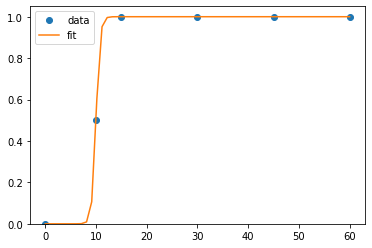

In [ ]:
import numpy as np
import pylab
from scipy.optimize import curve_fit

def fsigmoid(x, a, b):
    return 1.0 / (1.0 + np.exp(-a*(x-b)))

xdata = np.array([0, 10, 15, 30, 45, 60])
ydata = np.array([0, 0.5, 1, 1, 1, 1])

popt, pcov = curve_fit(fsigmoid, xdata, ydata, method='dogbox', 
                       # bounds=([0., 10.],[0.01, 15.])
                       )

print(popt)

x = np.linspace(0, 60, 60)
y = fsigmoid(x, *popt)

pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(x,y, label='fit')
pylab.ylim(0, 1.05)
pylab.legend(loc='best')
pylab.show()

In [ ]:
y

array([1.22578114e-11, 1.57785051e-10, 2.03104140e-09, 2.61439791e-08,
       3.36530534e-07, 4.33187246e-06, 5.57578794e-05, 7.17252013e-04,
       9.15465915e-03, 1.06288565e-01, 6.04881067e-01, 9.51704459e-01,
       9.96073160e-01, 9.99693828e-01, 9.99976208e-01, 9.99998152e-01,
       9.99999856e-01, 9.99999989e-01, 9.99999999e-01, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
      